#### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd. set_option('display.max_rows', 500)

In [2]:
# Setting style
from matplotlib import rcParams

sns.set_style('darkgrid')
rcParams['figure.figsize'] = 10.7,7.27

#### Importing Dataset

In [3]:
data_import = pd.read_csv("Edited Data/Data - What Occupations Have the Best Sex Life Edited - Main.csv")

#### Getting info about the dataset

## Cleaning Data and getting ready for analysis

In [4]:
data_copy = data_import.copy()

In [5]:
# Dropping unnecessary columns
columns_to_drop = ['Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'First Name', 'Last Name', 'Custom Data 1',
       'collector_type_source', 'custom_value8', 'custom_value9',
       'custom_value7','Unnamed: 16', 'Unnamed: 22', 'Device Type', 'Region']

In [6]:
# Creating copy of the dataset
data_copy.drop(columns = columns_to_drop, inplace = True)

In [7]:
#adding columns 'First Occupation' and 'Second Occupation'
data_copy[['First Occupation','Second Occupation']] = data_copy["What's your occupation?"].str.split(',', expand=True)

In [8]:
# Dropping "What's your occupation?" and "What's your Gender" column
drop_cols = ["What's your occupation?","What is your gender?"]
data_copy.drop(columns = drop_cols, inplace = True)

In [9]:
# Renaming Columns to make them more suitable for analysis
data_copy.rename(columns = {
        'Respondent ID' : 'ID',
        'Which of the following best describes the industry you work in?': 'Your Industry',
        'Which of the following best describes your current job level?' : 'Job Level',
        'What state do you reside in?' : 'State',
        'How happy or unhappy are you with your current role at your job?' : 'Job Role Happiness',
        'What is the highest degree or level of school you have completed? If currently enrolled, highest degree received.' : 'Highest Degree Completed',
        'What is your marital status?' : 'Marital Status',
        'How satisfied or dissatisfied are you with your sex life?' : 'Sexual Satisfaction',
        'How often do you have sex?' : 'Sex Frequency',
        'How often do you have an orgasm during sexual intercourse?': 'Orgasm Frequency',
        'How often do you fake an orgasm?' : 'Orgasm Faking',
        'How would you rate your "performance" in bed?' : 'Sexual Performance',
        'How many times per week do you exercise or work out?' : 'Excercise Frequency',
        'How desirable do you find yourself?' : 'Desirable Level',
        'Would you agree with the following statement: My sex life was better before I graduated from college than after I graduated.' : 'Better Sex Before Graduating',
        'Household Income' : 'Income',
        'First Occupation' : 'Occupation',
        'Second Occupation' : '2nd Occupation'}, inplace = True)

In [10]:
data_copy.head(3)

,ID,Your Industry,Job Level,State,Job Role Happiness,Highest Degree Completed,Marital Status,Sexual Satisfaction,Sex Frequency,Orgasm Frequency,Orgasm Faking,Sexual Performance,Excercise Frequency,Desirable Level,Better Sex Before Graduating,Income,Gender,Age,Occupation,2nd Occupation
0,13364008039,Entertainment & Leisure,Middle Management,Illinois,Very happy,High School,"Single, never married",Very satisfied,Every day,Always,Never,Far above average,Once per week,Very desirable,Somewhat agree,"$10,000-$24,999",Male,30-44,Server,None
1,13364006787,Business Support & Logistics,Intermediate,Pennsylvania,Somewhat happy,Bachelor's Degree,Married or domestic partnership,Neither satisfied nor dissatisfied,Less than once a month,Usually,Never,Average,Several times per week,Somewhat desirable,Strongly disagree,"$125,000-$149,999",Male,30-44,Administrative assistant,Data Analyst
2,13364005450,I am currently not employed,Other (please specify),Idaho,Neither happy nor unhappy,Some High School,"Single, never married",Neither satisfied nor dissatisfied,Less than once a month,Never,Never,Below average,Once per week,Somewhat desirable,Neither agree nor disagree,"$10,000-$24,999",Male,30-44,Carpenter,None


In [11]:
work_data = data_copy.copy()

In [12]:
# Changing positions of the columns
column_names = ['ID', 'Gender', 'Age', 'Your Industry','Occupation',
       '2nd Occupation', 'Job Level', 'Income', 'State', 'Job Role Happiness',
       'Highest Degree Completed', 'Marital Status', 'Sexual Satisfaction',
       'Sex Frequency', 'Orgasm Frequency', 'Orgasm Faking',
       'Sexual Performance', 'Excercise Frequency', 'Desirable Level',
       'Better Sex Before Graduating' ]
work_data = work_data.reindex(columns = column_names)
work_data.head(3)

,ID,Gender,Age,Your Industry,Occupation,2nd Occupation,Job Level,Income,State,Job Role Happiness,Highest Degree Completed,Marital Status,Sexual Satisfaction,Sex Frequency,Orgasm Frequency,Orgasm Faking,Sexual Performance,Excercise Frequency,Desirable Level,Better Sex Before Graduating
0,13364008039,Male,30-44,Entertainment & Leisure,Server,None,Middle Management,"$10,000-$24,999",Illinois,Very happy,High School,"Single, never married",Very satisfied,Every day,Always,Never,Far above average,Once per week,Very desirable,Somewhat agree
1,13364006787,Male,30-44,Business Support & Logistics,Administrative assistant,Data Analyst,Intermediate,"$125,000-$149,999",Pennsylvania,Somewhat happy,Bachelor's Degree,Married or domestic partnership,Neither satisfied nor dissatisfied,Less than once a month,Usually,Never,Average,Several times per week,Somewhat desirable,Strongly disagree
2,13364005450,Male,30-44,I am currently not employed,Carpenter,None,Other (please specify),"$10,000-$24,999",Idaho,Neither happy nor unhappy,Some High School,"Single, never married",Neither satisfied nor dissatisfied,Less than once a month,Never,Never,Below average,Once per week,Somewhat desirable,Neither agree nor disagree


## Data Analysis and Visualization

### Number of Participants per Gender

Previously, we could see that we have 563 entries which means that we have 563 unique participants. Now let's try to find out the gender of our participants:

In [13]:
gender_number = work_data['Gender'].value_counts().reset_index()

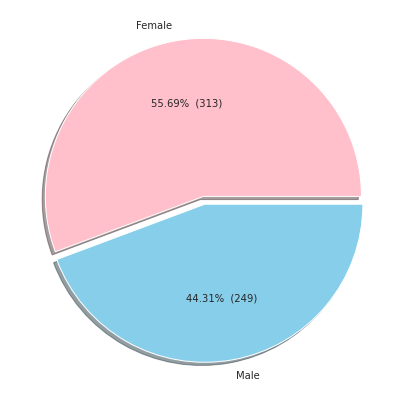

In [14]:
colors = sns.color_palette(['Pink', 'skyblue'])
labels = ['Female', 'Male']
explode = (0.05, 0.0)
values = [gender_number.Gender.sum()]
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(gender_number.Gender,
        explode = explode, 
        labels = labels, 
        autopct= make_autopct(values),
        colors = colors,
        shadow = True);

We can clearly see that of our 563 participants, 55.69% or 313 participants are female participants and 44.31% or 249 participants are male participants. That means that our dataset is well balanced between genders. <br><br>

### Number of Participants per Occupation

After we found out the number of female and male participants, we can now proceed to calculating the number of participants per occupation. The goal is to see if any occupation is dominating over some other occupations.

In [15]:
occupation_one = work_data['Occupation'].value_counts().reset_index()
occupation_two = work_data['2nd Occupation'].value_counts().reset_index()

In [16]:
frames = [occupation_one, occupation_two]
occupation_df = pd.concat(frames, ignore_index=True)
occupation_df = occupation_df.head(20)

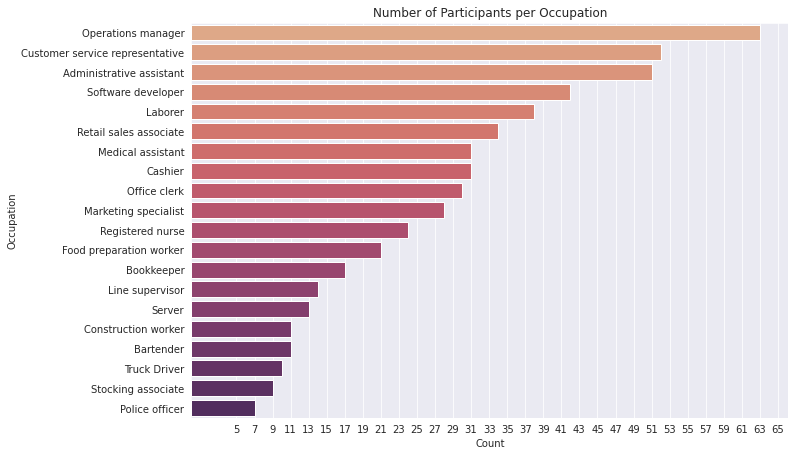

In [17]:
sns.barplot(x = occupation_df['Occupation'], y = occupation_df['index'], palette = 'flare')
plt.title('Number of Participants per Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.xticks(np.arange(5,66,2));

This BarPlot is showing us that the dominant occupation is 'Operations Manager' with 63 entries, by knowing that, we can point our focus to the top 6 occupations which are : <br>
Operations Manager (63),<br>
Customer Service Representative (52),<br>
Administrative Assistant (51),<br>
Software Developer (42),<br>
Laborer (38),<br>
Retail Sales Associate (34).<br>
We won't focus too much on other occupations because they have over 100% fewer entries than the top occupation 'Operations Manager' and because of that, they can not be seen as relevant.<br><br>

### Satisfaction With Job Role

Let's see how our participants are happy with their Job Role.

In [18]:
job_happiness = work_data[['Occupation' , 'Job Role Happiness']]

In [19]:
job_happiness['Job Role Happiness'].value_counts().reset_index()

,index,Job Role Happiness
0,Somewhat happy,197
1,Very happy,176
2,Neither happy nor unhappy,133
3,Somewhat unhappy,38
4,Very unhappy,16


Now that we have a clearer picture of our data, we can create a table where we can more easily see how the votes are distributed within each occupation. <br>

In [20]:
job_hpns = job_happiness[['Occupation', 'Job Role Happiness']].value_counts().reset_index()
job_hpns = job_hpns.groupby(['Occupation','Job Role Happiness']).sum()
job_hpns['Count'] = job_hpns.groupby(['Occupation','Job Role Happiness']).sum()
output = pd.pivot_table(data=job_hpns, 
                        index=['Occupation'], 
                        columns=['Job Role Happiness'], 
                        values='Count',
                        aggfunc='sum')
output

Job Role Happiness,Neither happy nor unhappy,Somewhat happy,Somewhat unhappy,Very happy,Very unhappy
Occupation,,,,,
Administrative assistant,9.0,20.0,3.0,17.0,2.0
Bartender,3.0,4.0,NaN,3.0,1.0
Bookkeeper,3.0,9.0,NaN,5.0,NaN
Carpenter,1.0,3.0,NaN,NaN,NaN
Cashier,9.0,11.0,1.0,10.0,NaN
Construction worker,2.0,2.0,2.0,5.0,NaN
Customer service representative,16.0,17.0,2.0,13.0,3.0
Electrician,NaN,1.0,NaN,4.0,NaN
Food preparation worker,6.0,4.0,2.0,8.0,1.0


Looking at the data we can see that there is not any major unhappiness with the job Role.<br>
We can see that in the category **'Neither happy nor unhappy'** most votes have: <br>
'Customer service representative' (16) followed by, <br>
'Laborer' (12),<br>'Office clerk'  (11).<br>
In the category **'Somewhat happy'**: <br>
'Software developer' (21) have most votes, followed by,<br>
'Administrative assistant' (20),<br>
'Customer service representative' (17),<br>
'Operations manager' (16),<br>
'Marketing specialist' (15).<br>
In the **'Very Happy'** category dominant Occupation is:
'Operations manager' (32) followed by,<br>
'Administrative assistant' (17),<br> 
'Customer service representative' (13), <br>
'Retail sales associate' and 'Marketing specialist' with (11) votes.<br>

### General Satisfaction with Sexual Life per Occupation


Now let's find out what is the general satisfaction with the sexual life of our participants. <br>
To have a better understanding of the level of satisfaction, I transformed sexual satisfaction answers into satisfaction levels.<br>
**The changes are**:<br>
>"Very Dissatisfied" -> 1,<br>
>"Dissatisfied" -> 2,<br>
>"Neither satisfied nor dissatisfied" -> 3,<br>
>"Satisfied" -> 4,<br>
>"Very satisfied" -> 5.<br>

In [21]:
stfc_df = work_data[['Sexual Satisfaction', 'Occupation', 'Excercise Frequency']]

In [22]:
my_map = {'Very dissatisfied': 1, 'Dissatisfied': 2, 'Neither satisfied nor dissatisfied': 3, 'Satisfied': 4, 'Very satisfied': 5}
stfc_df = stfc_df.applymap(lambda s: my_map.get(s) if s in my_map else s)

#### Occupations with level 1 ('Very Dissatisfied') Sexual Satisfaction

In [35]:
sexual_satisfaction_1 = stfc_df[['Sexual Satisfaction', 'Occupation']].value_counts().reset_index().head(50)
sex_satisfaction_1 = sexual_satisfaction_1.groupby(['Sexual Satisfaction','Occupation' ]).sum()
satisfaction_df1 = sexual_satisfaction_1[sexual_satisfaction_1['Sexual Satisfaction'] == 1]
satisfaction_df1

,Sexual Satisfaction,Occupation,0
26,1,Customer service representative,7
27,1,Software developer,7
38,1,Laborer,6
45,1,Operations manager,5


The Table is grouped by *'Sexual Satisfaction' (Left Column)*, followed by *'Occupation' (Middle Column)* and on the right, we have the *SUM* which represents the number of participants in every 'Sexual Satisfaction' group. <br>

#### Occupations with level 2 ('Dissatisfied') Sexual Satisfaction

In [24]:
satisfaction_df2 = sexual_satisfaction_1[sexual_satisfaction_1['Sexual Satisfaction'] == 2]
satisfaction_df2

,Sexual Satisfaction,Occupation,0
19,2,Marketing specialist,9
20,2,Administrative assistant,8
24,2,Software developer,7
32,2,Customer service representative,7
41,2,Operations manager,5


The Table is grouped by *'Sexual Satisfaction' (Left Column)*, followed by *'Occupation' (Middle Column)* and on the right, we have the *SUM* which represents the number of participants in every 'Sexual Satisfaction' group. <br>

#### Occupations with level 3 ('Neither satisfied nor dissatisfied') Sexual Satisfaction

In [25]:
satisfaction_df3 = sexual_satisfaction_1[sexual_satisfaction_1['Sexual Satisfaction'] == 3]
satisfaction_df3

,Sexual Satisfaction,Occupation,0
1,3,Administrative assistant,19
2,3,Customer service representative,18
5,3,Operations manager,15
8,3,Laborer,12
11,3,Office clerk,11
12,3,Medical assistant,11
15,3,Cashier,10
18,3,Registered nurse,9
25,3,Software developer,7
33,3,Line supervisor,6


The Table is grouped by *'Sexual Satisfaction' (Left Column)*, followed by *'Occupation' (Middle Column)* and on the right, we have the *SUM* which represents the number of participants in every 'Sexual Satisfaction' group. <br>

#### Occupations with level 4 ('Satisfied') Sexual Satisfaction

In [26]:
satisfaction_df4 = sexual_satisfaction_1[sexual_satisfaction_1['Sexual Satisfaction'] == 4]
satisfaction_df4

,Sexual Satisfaction,Occupation,0
0,4,Operations manager,21
4,4,Administrative assistant,16
6,4,Software developer,14
9,4,Medical assistant,11
10,4,Retail sales associate,11
14,4,Laborer,10
16,4,Customer service representative,10
21,4,Marketing specialist,8
22,4,Office clerk,8
30,4,Food preparation worker,7


The Table is grouped by *'Sexual Satisfaction' (Left Column)*, followed by *'Occupation' (Middle Column)* and on the right, we have the *SUM* which represents the number of participants in every 'Sexual Satisfaction' group. <br>

#### Occupations with level 5 ('Very Satisfied') Sexual Satisfaction

In [27]:
satisfaction_df5 = sexual_satisfaction_1[sexual_satisfaction_1['Sexual Satisfaction'] == 5]
satisfaction_df5

,Sexual Satisfaction,Occupation,0
3,5,Operations manager,17
7,5,Retail sales associate,13
13,5,Customer service representative,10
17,5,Cashier,9
23,5,Administrative assistant,7
28,5,Software developer,7
29,5,Medical assistant,7
34,5,Registered nurse,6
37,5,Laborer,6
39,5,Food preparation worker,6


The Table is grouped by *'Sexual Satisfaction' (Left Column)*, followed by *'Occupation' (Middle Column)* and on the right, we have the *SUM* which represents the number of participants in every 'Sexual Satisfaction' group. <br>

We can see that we have some 'Occupations' that are repeating in some Sexual Satisfaction groups. <br>
Let's use Occupations from level 1 and level 2 and categorise them as 'Dissatisfied' and from level 4 and level 5 as 'Satisfied'.<br><br>
Occupations that we can categorise as **Dissatisfied** are:<br>
>Customer service representative (14), <br>
>Software developer (14), <br>
>Operations manager (10), <br>
>Marketing specialist (9), <br>
>Administrative assistant (8), <br>
>Software developer (7), <br>
>Customer service representative (7), <br>
>Laborer (6) <br> <br>

Occupations that we can categorise as **Satisfied** are:
>Operations manager (38), <br>
>Retail sales associate (24), <br>
>Administrative Assistant (23),<br> 
>Software developer (21),<br> 
>Customer service representative (20),<br> 
>Medical assistant (18),<br> 
>Laborer (16),<br> 
>Cashier (16),<br> 
>Food preparation worker (13),<br> 
>Office clerk (13)<br>
>Registered nurse (11) <br>
>Marketing specialist (8) <br>
>Construction worker (4) <br>
>Janitor (4) <br>
>Lawyer (4) <br>
>Server (4) <br>

###  More filtered data with 'Exercise Frequency' column

Let's now filter data furthermore and try to see if there is any correlation between *Exercise Frequency* and *Sexual Satisfaction*.

In [28]:
sexual_satisfaction_2 = stfc_df[['Sexual Satisfaction', 'Occupation', 'Excercise Frequency']].value_counts().reset_index().head(80)
sex_satisfaction_2 = sexual_satisfaction_2.groupby(['Sexual Satisfaction', 'Occupation', 'Excercise Frequency']).sum().sort_values('Sexual Satisfaction')
sex_satisfaction_2

0
Sexual Satisfaction Occupation                      Excercise Frequency             
1                   Customer service representative I never work out or exercise   3
                    Operations manager              Several times per week         2
2                   Administrative assistant        Less than once per week        3
                                                    Several times per week         3
                    Bookkeeper                      Several times per week         3
                    Customer service representative I never work out or exercise   3
                    Marketing specialist            Less than once per week        3
                                                    Several times per week         3
                    Software developer              Several times per week         3
3                   Medical assistant               Once per week                  3
                                                    Several times per week         5
                    Office clerk                    Less than once per week        3
                                                    Several times per week         5
                    Operations manager              I never work out or exercise   3
                                                    Less than once per week        4
                    Registered nurse                Once per week                  3
                    Operations manager              Several times per week         4
                    Registered nurse                I never work out or exercise   4
                    Line supervisor                 Several times per week         4
                    Retail sales associate          Less than once per week        3
                                                    Several times per week         2
                    Operations manager              Once per week                  3
                    Line supervisor                 Once per week                  2
                    Marketing specialist            Several times per week         2
                    Laborer                         Once per week                  2
                                                    Several times per week         2
                    Administrative assistant        Less than once per week        4
                                                    Several times per week         6
                    Bookkeeper                      Several times per week         3
                    Cashier                         Every day of the week          4
                                                    Several times per week         3
                    Administrative assistant        I never work out or exercise   7
                    Customer service representative Once per week                  4
                                                    Several times per week         7
                    Food preparation worker         Several times per week         3
                    Laborer                         I never work out or exercise   5
                                                    Less than once per week        3
                    Customer service representative I never work out or exercise   3
4                   Office clerk                    Several times per week         4
                    Operations manager              Every day of the week          2
                                                    I never work out or exercise   3
                                                    Once per week                  3
                                                    Several times per week        11
                    Retail sales associate          Every day of the week          3
                    Software developer              Less than once per week        3
                    Server                          Several times per week         4
   

As described in the previous section, data is grouped on *'Sexual Satisfaction'* (Left Column), *'Occupation'* (Middle Column), we added one more column *'Exercise Frequency'* on which we are filtering data, and on the right is the *SUM* of participants with their exercise Frequency answers. Looking at the data we can recognize patterns. We can clearly see that *'Occupations'* with *'Sexual Satisfaction'* levels 4 and 5 tend to exercise more, we can see that in the category 4 and 5 dominant answer is *'Several times per week'* followed by *'Every day of the week'*.<br> As further we go, in *'Sexual Satisfaction'* level 3 and below we can see that answers are changing to *'Less than once per week'*, *'Once per week'*, and *'I never work out or exercise'*.
So after reviewing the data we can tell that **there is a correlation between sexual satisfaction and working out**.

### Plotting average level of Sexual Satisfaction

Lastly let's plot the average level of sexual satisfaction per *'Occupation'*.

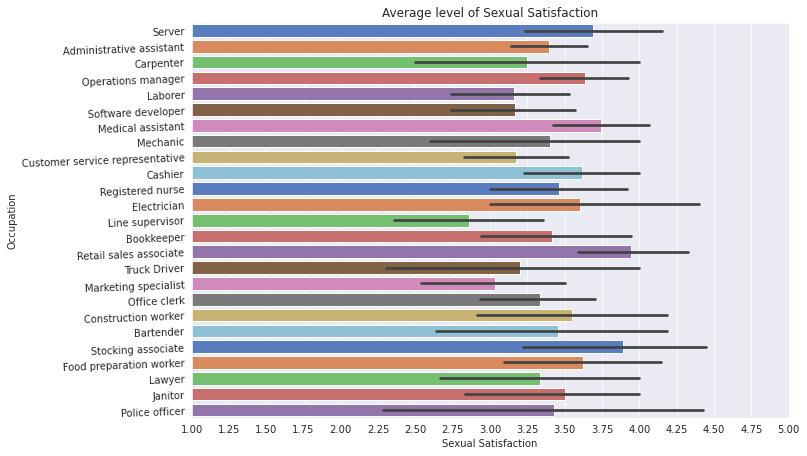

In [29]:
sns.barplot(y =stfc_df['Occupation'] ,x = stfc_df['Sexual Satisfaction'], palette = 'muted')
plt.xticks(np.arange(0,5.5,0.25))
plt.yticks(rotation = 2)
plt.xlim(1,5)
plt.title('Average level of Sexual Satisfaction');

In the plot above we can see levels of average *'Sexual Satisfaction'* of our participants based on their *'Occupation'*. <br> The black horizontal lines represent *'Standard Deviation'* of our data, and here we can see that in some 'Occupations' deviation is smaller than in the others, keeping that deviation in mind we can conclude that we can use this plot only **as a reference**, but we can get some sense of a range of our data.

In [30]:
work_data.to_csv('Final.csv')

### Comparisson between sexualy "Very satisfied" and "Very Dissatisfied" occupations based on their Exercise routine

Let's create dataframe with 'Very Satisfied' occupations.

In [31]:
a_df = work_data[['Sexual Satisfaction', 'Occupation', 'Excercise Frequency']]
my_map = {'Very dissatisfied': 1, 'Dissatisfied': 2, 'Neither satisfied nor dissatisfied': 3, 'Satisfied': 4, 'Very satisfied': 5}
a_df = a_df.applymap(lambda s: my_map.get(s) if s in my_map else s)

In [32]:
satisfied = a_df[['Sexual Satisfaction', 'Occupation', 'Excercise Frequency']].value_counts().reset_index()
satistied_df = satisfied[satisfied['Sexual Satisfaction'] == 5]
satisfied_final = satistied_df.groupby(['Excercise Frequency','Sexual Satisfaction','Occupation']).sum()
satisfied_final['Count'] = satistied_df.groupby(['Excercise Frequency','Sexual Satisfaction','Occupation']).sum()
satisfied_final[satisfied_final['Count']>1]

0  \
Excercise Frequency          Sexual Satisfaction Occupation                            
Every day of the week        5                   Bartender                         2   
                                                 Customer service representative   2   
                                                 Food preparation worker           2   
                                                 Operations manager                7   
                                                 Registered nurse                  2   
                                                 Software developer                3   
I never work out or exercise 5                   Office clerk                      2   
                                                 Retail sales associate            2   
Less than once per week      5                   Medical assistant                 2   
                                                 Operations manager                2   
Once per week                5                   Cashier                           3   
                                                 Customer service representative   2   
                                                 Food preparation worker           2   
                                                 Medical assistant                 2   
Several times per week       5                   Administrative assistant          4   
                                                 Bartender                         2   
                                                 Bookkeeper                        3   
                                                 Cashier                           3   
                                                 Customer service representative   4   
                                                 Laborer                           2   
                                                 Operations manager                5   
                                                 Registered nurse                  2   
                                                 Retail sales associate           10   
                                                 Software developer                3   
                                                 Stocking associate                2   

                                                                                  Count  
Excercise Frequency          Sexual Satisfaction Occupation                              
Every day of the week        5                   Bartender                            2  
                                                 Customer service representative      2  
                                                 Food preparation worker              2  
                                                 Operations manager                   7  
                                                 Registered nurse                     2  
                                                 Software developer                   3  
I never work out or exercise 5                   Office clerk                         2  
                                                 Retail sales associate               2  
Less than once per week      5                   Medical assistant                    2  
                                                 Operations manager                   2  
Once per week                5                   Cashier                              3  
                                                 Customer service representative      2  
                                                 Food preparation worker              2  
                                                 Medical assistant                    2  
Several times per week       5                   Administrative assistant             4  
                                                 Bartender                            2  
                                                 Bookkeeper                           

We can see that a large proportion of sexually satisfied occupations exercise **'Several times per week'** (40) or **'Every day of the week'** (18).
Now let's take a look at the data frame below that contains *Dissatisfied occupations*.<br>

In [33]:
dissatisfied = a_df[['Sexual Satisfaction', 'Occupation', 'Excercise Frequency']].value_counts().reset_index()
dissatistied_df = dissatisfied[dissatisfied['Sexual Satisfaction'] == 1 ]
dissatisfied_final = dissatistied_df.groupby(['Excercise Frequency','Sexual Satisfaction','Occupation']).sum()
dissatisfied_final['Count'] = dissatistied_df.groupby(['Excercise Frequency','Sexual Satisfaction','Occupation']).sum()
dissatisfied_final[dissatisfied_final['Count']>1]

0  \
Excercise Frequency          Sexual Satisfaction Occupation                           
Every day of the week        1                   Software developer               2   
I never work out or exercise 1                   Customer service representative  3   
                                                 Operations manager               2   
Less than once per week      1                   Software developer               2   
Once per week                1                   Laborer                          2   
Several times per week       1                   Laborer                          2   
                                                 Line supervisor                  2   
                                                 Marketing specialist             2   
                                                 Operations manager               2   
                                                 Software developer               2   

                                                                                  Count  
Excercise Frequency          Sexual Satisfaction Occupation                              
Every day of the week        1                   Software developer                   2  
I never work out or exercise 1                   Customer service representative      3  
                                                 Operations manager                   2  
Less than once per week      1                   Software developer                   2  
Once per week                1                   Laborer                              2  
Several times per week       1                   Laborer                              2  
                                                 Line supervisor                      2  
                                                 Marketing specialist                 2  
                                                 Operations manager                   2  
                                                 Software developer                   2

Here we have a data frame with sexually *'Very Dissatisfied'* occupations. As we can see, the data in this data set is significantly smaller so we can not draw a clear line but if we reflect to *"More filtered data with 'Exercise Frequency' column"* part in this analysis, we can see that if sexual satisfaction is lower then more common answers are 'I never work out or exercise', 'Less than once per week' or 'Once per week'.

______________________________________________________________________________________________________________________________________________________________________________